In [1]:
import geopandas as gpd
import geoplot
from glob import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
import rasterio
from rasterio.plot import show
import fiona
from descartes import PolygonPatch

In [2]:
wd = 'data/IN_expansion_area_UTM'
f = glob(f'{wd}/*.shp')[0]
print(f)
df = gpd.read_file(f).to_crs(epsg=4326)

data/IN_expansion_area_UTM/IN_expansion_area_UTM.shp


/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [5]:
df

ID          AREA   PERIMETER       NAME       ACRES   HECTARES  ENG_NAME  \
0   1  1.346921e+07   23201.201     Tugrug       0.000      0.000      None   
1   2  1.079672e+08   69860.031    Kharaat       0.000      0.000      None   
2   3  4.414518e+07   28383.884  Baga Nart       0.000      0.000      None   
3   0  3.895237e+08  159360.504       None       0.000      0.000      None   
4   0  6.661913e+08  141436.201       None  164619.459  66619.127  Ikh nart   

  STATUS  PNTPOLYCNT     Shape_Leng    Shape_Area  \
0   None           0   23067.959450  1.330811e+07   
1   None           0   69347.574107  1.069707e+08   
2   None           0   28455.032445  4.424821e+07   
3   None           0  159736.891959  3.909870e+08   
4     NR         146  141349.548680  6.653772e+08   

                                            geometry  
0  POLYGON ((108.72335 45.77241, 108.69828 45.803...  
1  POLYGON ((108.58670 45.84384, 108.54667 45.759...  
2  POLYGON ((108.73744 45.58418, 108.86773 45.560...  
3  POLYGON ((108.51092 45.58513, 108.58388 45.570...  
4  POLYGON ((108.63884 45.86689, 108.64556 45.855...

In [6]:
# look at the WDPA-data to compare.
wdpa_file = glob(f'data/WDPAshp/*.shp')[0]
print(wdpa_file)
wdpa = gpd.read_file(wdpa_file).to_crs(epsg=4326)

data/WDPAshp/WDPA_Nov2019-shapefile-polygons.shp


/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


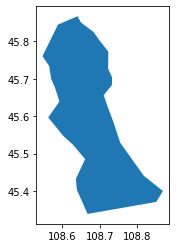

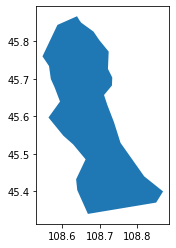

In [20]:
wdpa[wdpa['NAME']=='Ikh nart'].plot()
df[df['ENG_NAME']=='Ikh nart'].plot()

In [41]:
ikhnart = df[df.ENG_NAME=='Ikh nart']
clat = float(ikhnart.geometry.centroid.y)
clon = float(ikhnart.geometry.centroid.x)

In [52]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
mongolia = gpd.read_file('data/mongolia/mongolia69.shp')
dem = rasterio.open('data/geotiff/srtm-dem.tif')

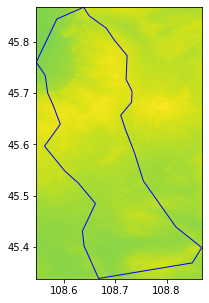

In [162]:
f, ax = plt.subplots(1,1,figsize=(8,5))
ikhnart.plot(ax =ax, facecolor='none', edgecolor='blue')
show(dem, ax=ax)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  


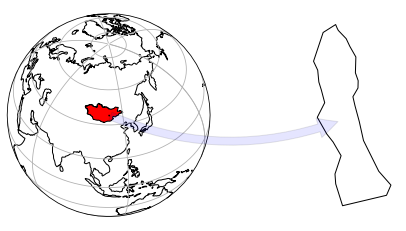

In [172]:
fig, axarr = plt.subplots(1,2, figsize=(8,4),\
                        subplot_kw={'projection':\
                                    geoplot.crs.Orthographic(central_latitude=clat,\
                                              central_longitude=clon)})
geoplot.polyplot(mongolia, facecolor='red', ax=axarr[0])
geoplot.polyplot(ikhnart, facecolor='yellow', ax=axarr[0])
geoplot.polyplot(ikhnart, ax=axarr[1], \
                 facecolor='none', \
                 edgecolor='black')

#show(dem.read(), ax = axarr[1])

axarr[0].set_global()
axarr[0].outline_patch.set_visible(True)
axarr[0].coastlines()
axarr[0].gridlines()

ax0tr = axarr[0].transData # Axis 0 -> Display
ax1tr = axarr[1].transData # Axis 1 -> Display
figtr = fig.transFigure.inverted() # Display -> Figure
# 2. Transform arrow start point from axis 0 to figure coordinates
ptB = figtr.transform(ax0tr.transform((225., -10.)))
# 3. Transform arrow end point from axis 1 to figure coordinates
ptE = figtr.transform(ax1tr.transform((225., 1.)))
# 4. Create the patch
arrow = mpl.patches.FancyArrowPatch(
    # Place arrow in figure coord system
    ptB, ptE, transform=fig.transFigure, \
    fc = "blue", connectionstyle="arc3,rad=0.2", \
    arrowstyle='simple', \
    alpha = 0.1,\
    mutation_scale = 40.
)
# 5. Add patch to list of objects to draw onto the figure
fig.patches.append(arrow)
fig.savefig('figs/iknart_map.png', dpi=200, bbox_inches='tight')
